In [1]:
import numpy as np
from qiskit import *
from qiskit.tools. visualization import plot_histogram 
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
secretNumber = "10001000001"

In [3]:
circuit= QuantumCircuit(len(secretNumber)+1,len(secretNumber))

index 0 is 1
index 1 is 0
index 2 is 0
index 3 is 0
index 4 is 0
index 5 is 0
index 6 is 1
index 7 is 0
index 8 is 0
index 9 is 0
index 10 is 1


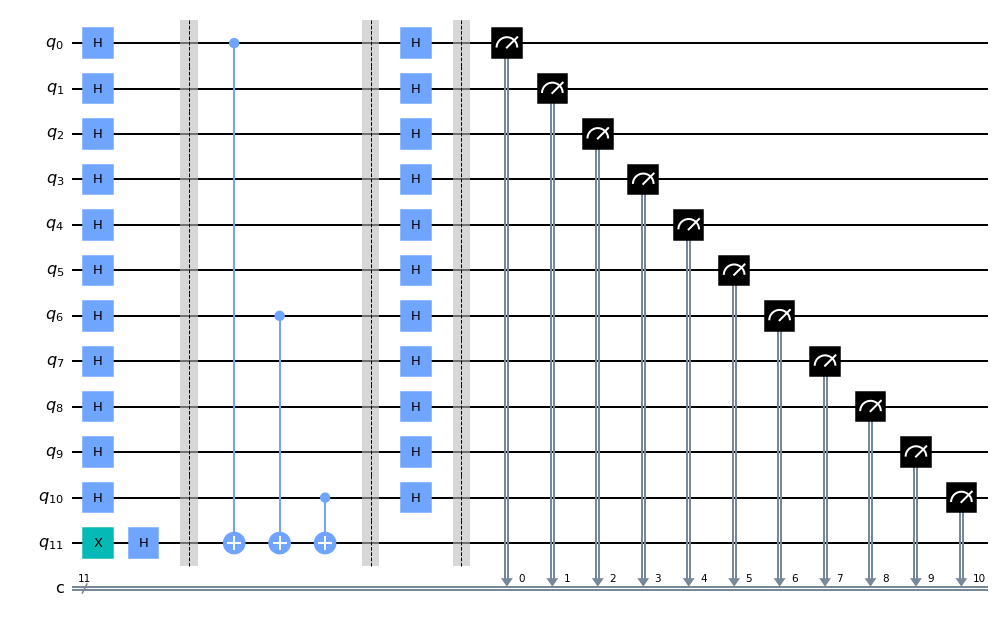

In [4]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"index {index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))

circuit.barrier()

circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

circuit.draw(output='mpl')

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'10001000001': 1}
